In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

nyc_shapefile = "./geo_export_27cc1a18-69b6-4a5c-bfab-4d2d3d9b3108.shp"
stations_csv = "./stations.csv"

In [2]:
nyc = gpd.read_file(nyc_shapefile)
stations = pd.read_csv(stations_csv)

In [3]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(stations['Longitude'], stations['Latitude'])]
crs = nyc.crs
stations_geo = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)

stations_geo

,Station,Longitude,Latitude,geometry
0,34 ST-PENN STA,-73.991057,40.750373,POINT (-73.99106 40.75037)
1,GRD CNTRL-42 ST,-73.979189,40.752769,POINT (-73.97919 40.75277)
2,34 ST-HERALD SQ,-73.987772,40.749789,POINT (-73.98777 40.74979)
3,86 ST,-73.976218,40.788644,POINT (-73.97622 40.78864)
4,23 ST,-73.989272,40.741339,POINT (-73.98927 40.74134)
5,TIMES SQ-42 ST,-73.986229,40.755983,POINT (-73.98623 40.75598)
6,42 ST-PORT AUTH,-73.989735,40.757308,POINT (-73.98974 40.75731)
7,14 ST-UNION SQ,-73.989951,40.734673,POINT (-73.98995 40.73467)
8,PATH NEW WTC,-74.009745,40.712564,POINT (-74.00974 40.71256)
9,125 ST,-73.945495,40.807754,POINT (-73.94550 40.80775)


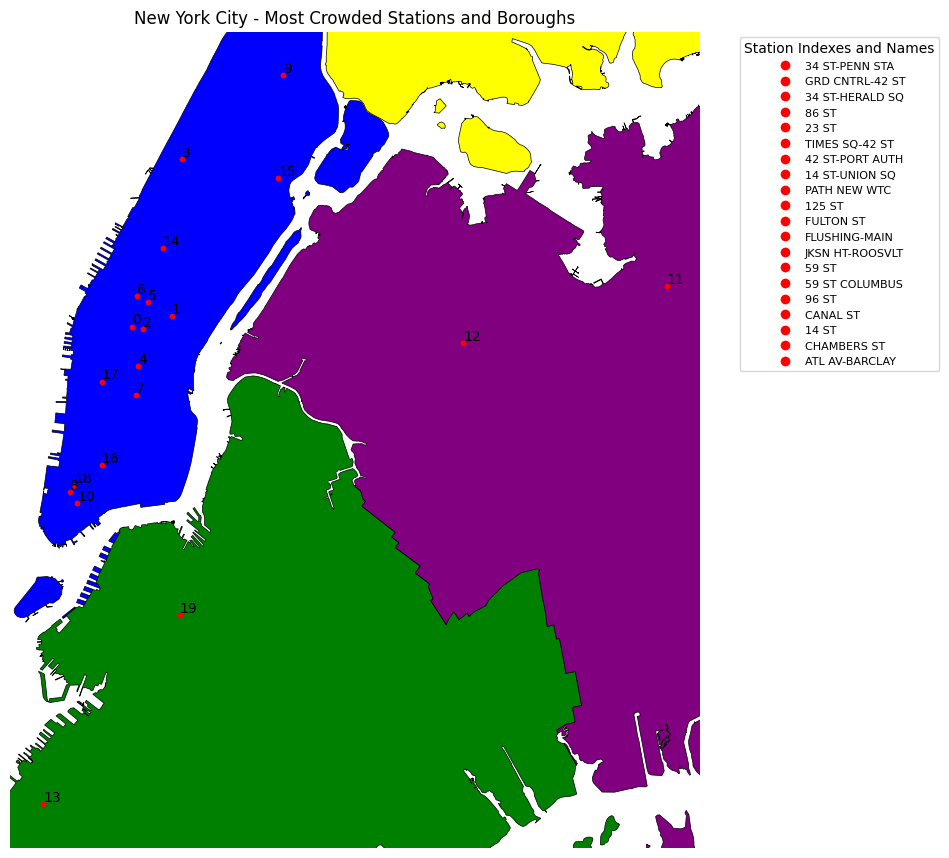

In [4]:
from matplotlib.lines import Line2D

borough_colors = {
    'Bronx': 'yellow',
    'Brooklyn': 'green',
    'Manhattan': 'blue',
    'Queens': 'purple',
    'Staten Island': 'orange'
}

fig, ax = plt.subplots(figsize=(12, 12))

for borough, color in borough_colors.items():
    nyc[nyc['boro_name'] == borough].plot(ax=ax, color=color, edgecolor='black', linewidth=0.5)

stations_geo.plot(ax=ax, markersize=10, color='red', marker='o', label='En Kalabalık İstasyonlar')
legend_elements = [Line2D([0], [0], marker='o', color='w', label=row['Station'], markerfacecolor='red', markersize=8) for idx, row in stations_geo.iterrows()]

for idx, row in stations_geo.iterrows():
    plt.annotate(text=str(idx), xy=(row['Longitude'], row['Latitude']),
                 horizontalalignment='left', verticalalignment='bottom', fontsize=10, color='black')

min_longitude, max_longitude = stations_geo['Longitude'].min(), stations_geo['Longitude'].max()
min_latitude, max_latitude = stations_geo['Latitude'].min(), stations_geo['Latitude'].max()

ax.set_xlim(min_longitude - 0.01, max_longitude + 0.01)
ax.set_ylim(min_latitude - 0.01, max_latitude + 0.01)
ax.set_axis_off()


ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1), title='Station Indexes and Names', prop={'size': 8})
plt.subplots_adjust(right=0.7) 

plt.title("New York City - Most Crowded Stations and Boroughs")
plt.show()